<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [3]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite --output m4_survey_data.sqlite[^1^][1]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0 34.9M    0  128k    0     0  27160      0  0:22:30  0:00:04  0:22:26 27159
  1 34.9M    1  464k    0     0  83984      0  0:07:16  0:00:05  0:07:11 94667
  3 34.9M    3 1392k    0     0   210k      0  0:02:49  0:00:06  0:02:43  282k
  8 34.9M    8 3200k    0     0   419k      0  0:01:25  0:00:07  0:01:18  672k
 11 34.9M   11 4048k    0     0   456k      0  0:01:18  0:00:08  0:01:10  785k
 12 34.9M   12 4368k    0     0   441k      0  0:01

Connect to the database.


In [4]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [13]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Demo: How to run an sql query


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:>

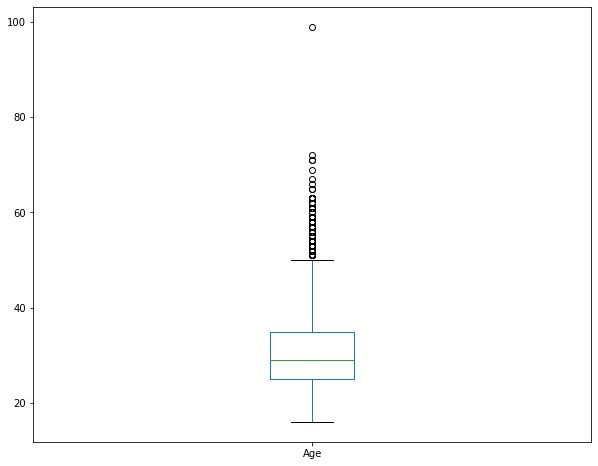

In [11]:
Query2 = """
SELECT Age 
FROM master
"""

Age= pd.read_sql_query(Query2, conn)
Age.plot(kind='box', figsize=(10, 8))


### Box Plots


Plot a box plot of `Age.`


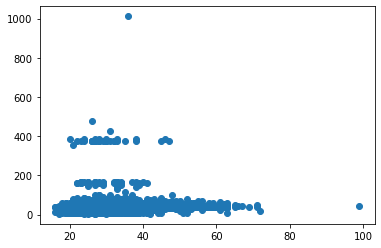

In [14]:
Query3= """
SELECT Age
FROM master
"""
Query4= """
SELECT WorkWeekHrs
FROM master
"""

Query5="""
SELECT Age, WorkWeekHrs
FROM master
"""
Age=pd.read_sql_query(Query3, conn)
WorkWeekHrs= pd.read_sql_query(Query4, conn)
Age_WorkWeekHrs=pd.read_sql_query(Query5, conn)
plt.scatter(x=Age, y=WorkWeekHrs)


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


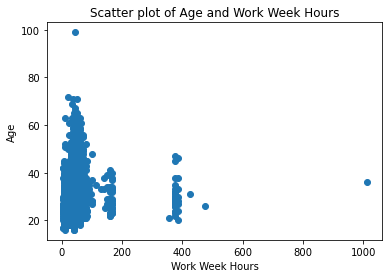

In [16]:
Query = """
SELECT Age, WorkWeekHrs 
FROM master
"""
data=pd.read_sql_query(Query, conn)
plt.scatter(x=data['WorkWeekHrs'], y=data['Age'])
plt.xlabel('Work Week Hours')
plt.ylabel('Age')
plt.title('Scatter plot of Age and Work Week Hours')
plt.show()




### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


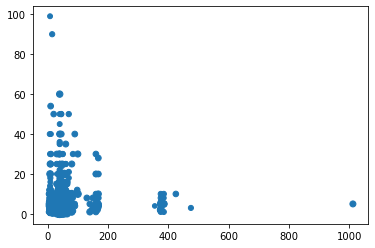

In [17]:
Query6 = """
SELECT CodeRevHrs 
FROM master
"""
CodeRevHrs=pd.read_sql_query(Query6, conn)
plt.scatter(x=WorkWeekHrs, y=CodeRevHrs, s=Age)


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


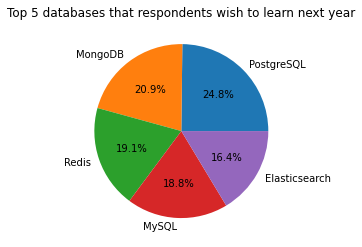

In [18]:
# your code goes here

# Import pandas and matplotlib modules
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database file
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

# Run an SQL query to get the data for the pie chart
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count 
FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear 
ORDER BY count DESC 
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)

# Create a pie chart with labels and percentages
plt.pie(df["count"], labels=df["DatabaseDesireNextYear"], autopct="%1.1f%%")
plt.title("Top 5 databases that respondents wish to learn next year")
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


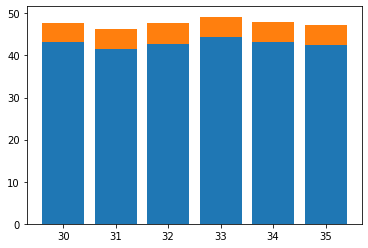

In [19]:
Query8 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""

z = pd.read_sql_query(Query8, conn)
WorkWeekHrs= z['Avg(WorkWeekHrs)']
CodeRevHrs= z['Avg(CodeRevHrs)']
Age= z['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')

plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


    Avg(ConvertedComp)   Age
0        187374.012821  45.0
1        231703.737705  46.0
2        142093.126984  47.0
3        157251.532258  48.0
4        214709.000000  49.0
5        143120.464286  50.0
6        123404.666667  51.0
7        255217.236842  52.0
8        257196.758621  53.0
9        144287.041667  54.0
10       150508.583333  55.0
11       107843.357143  56.0
12       127548.700000  57.0
13       332839.833333  58.0
14       350231.800000  59.0
15       132287.500000  60.0


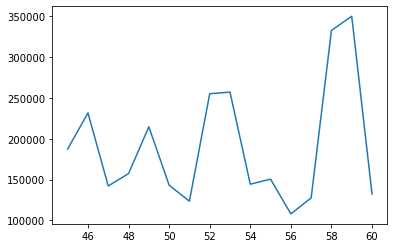

In [24]:
Query9= """
SELECT Avg(ConvertedComp), Age
FROM master
where age between 45 and 60
group by Age
"""
ConvertedComp_Age= pd.read_sql_query(Query9, conn)
ConvertedComp_Age
plt.plot(ConvertedComp_Age['Age'],ConvertedComp_Age['Avg(ConvertedComp)'])
print(ConvertedComp_Age)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


,MainBranch,count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


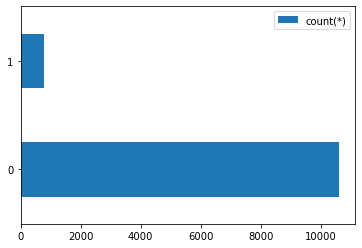

In [25]:
# your code goes here
Query10="""
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""
MainBranch=pd.read_sql_query(Query10, conn)
MainBranch.plot(kind='barh')
MainBranch



Close the database connection.


In [26]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
